<a href="https://colab.research.google.com/github/ISRAEL-MP/Practica0_Comentario_codigo_-limpio/blob/main/Israel_Mallma_(deteccion_peatones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

# Detector cruce peatonal de personas**Israel Mallma Perez**_

## Paso 1: Permitimos el acceso a nuestro drive

In [3]:
# Cargamos nuestro drive en el notebook de trabajo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Paso 2: Cambiar el entorno de ejecucion a GPU

*  Entorno de ejecución -> Cambiar tipo de entorno de ejecución -> GPU  (Español)

*  Runtime -> Change Runtime Type -> GPU  (Inglés )

![Imagen](https://docs.google.com/uc?export=download&id=1nhGl8S6S-Hbp5eLMqPeq_cMQ8A_7UoQg)  

## Paso 3:  Descargar el detector de objetos y configurar nuestro espacio de trabajo (Correr solo 1 vez)

In [4]:
# Clonamos repositorio de YOLO
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Habilitar GPU y OPENCV
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# Make
!make
!chmod 755 darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 12 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.38 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (10675/10675), done.
/content/darknet
--2024-05-25 21:57:05--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/75388965/ba4b6380-889c-11ea-9751-f994f5961796?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240525%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240525T215706Z&X-Amz-Expires=300&X-Amz-Signature=3b4aebeba2a1a86eb795b0ef4078026635b0b

## Paso 4:  Detección en imagenes

### Copiar y renombrar la imagen


In [20]:
#Archivo origen: imagen.jpg
!cp "/content/7.jpg" imagen_descargada.jpg

### Correr el detector

In [24]:
!./darknet detect cfg/yolov4.cfg yolov4.weights imagen_descargada.jpg -thresh 0.70 -dont_show

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 

In [25]:
#Función para desplegar las imagenes
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

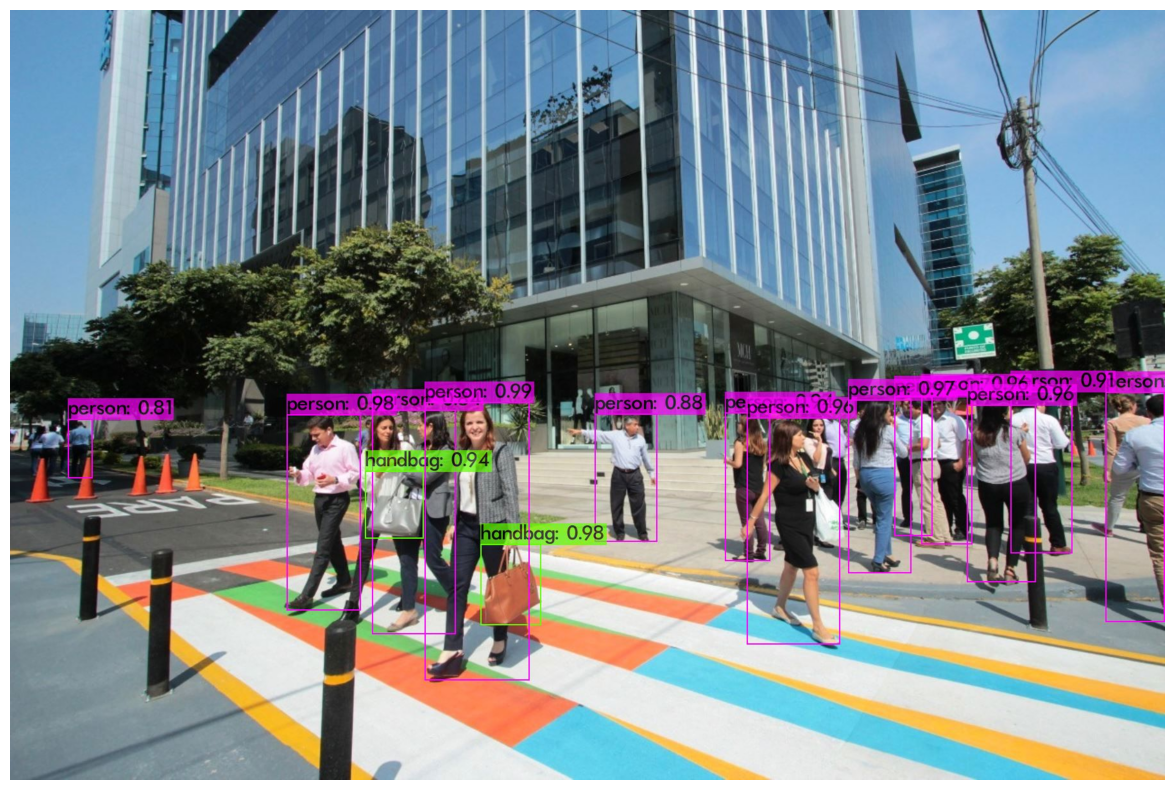

In [26]:
# Función para mostrar la imagen
imShow('predictions.jpg')

### Copiar y renombrar el archivo en nuestro Drive

In [27]:
#Copiar y renombrar el archivo
!cp predictions.jpg "/content/drive/MyDrive/Deteccion/deteccion_th70.jpg"

## Paso 5: Detección en video

### Copiar y renombrar el archivo de video

In [28]:
#Copiar y renombrar el archivo
#Archivo origen: altos_semaforos
!cp "/content/Peatones.mp4" video_descargado.mp4

### Correr el detector

In [29]:
# Corriendo YOLO
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights video_descargado.mp4 -thresh 0.60 -dont_show -out_filename video_detectado.mp4
!ls *.mp4

Se han truncado las últimas 5000 líneas del flujo de salida.
Objects:

car: 95% 
car: 62% 

FPS:22.6 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 97% 
car: 62% 

FPS:22.7 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 98% 

FPS:22.8 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 98% 
car: 79% 
car: 66% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 87% 
car: 77% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 90% 
car: 83% 

FPS:22.8 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 85% 
car: 78% 

FPS:22.8 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 88% 
car: 78% 

FPS:22.8 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 89% 
car: 77% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 87% 
car: 79% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 82% 
car: 70% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects:

car: 99% 
car: 89% 
car: 76% 

FPS:22.9 	 AVG_FPS:22.8

 cvWriteFrame 
Objects

### Copiar el video detectado a nuestro Drive

In [30]:
#Copiar y renombrar el archivo
!cp video_detectado.mp4 "/content/drive/MyDrive/Deteccion/deteccion_video_60.mp4"